[깃허브 주소](https://github.com/ADPclass/ADP_book_ver01/tree/main/%EC%B5%9C%EC%8B%A0%20%EA%B8%B0%EC%B6%9C%EB%8F%99%ED%98%95%20%EB%AA%A8%EC%9D%98%EA%B3%A0%EC%82%AC)

## 머신러닝
### 1. 데이터 전처리

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

df = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/27_problem1.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount,Class
0,60.0,1.069141,0.043786,0.309867,1.316694,-0.462394,-0.857888,0.207904,-0.191270,0.056398,0.041567,-0.507358,-0.108666,-0.473257,0.452046,1.005675,0.185441,-0.439976,89.40,0
1,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,0.00,1
2,426.0,-1.932055,1.724618,1.288229,-0.396998,-0.140202,2.470521,-1.865298,-5.186855,0.794764,0.155379,0.034517,0.906738,-0.027172,-0.404303,-0.473949,0.274034,-0.222340,16.19,0
3,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,529.00,1
4,674.0,-0.719065,0.638954,0.686335,-0.023240,2.317890,3.871978,-0.312797,1.089780,-0.596925,-0.006142,-0.242883,-0.384491,0.109079,0.187565,1.823472,0.274346,-0.697730,22.00,0


#### (1) 데이터의 특징을 파악하시오(EDA).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1193 non-null   float64
 1   V1      1193 non-null   float64
 2   V2      1193 non-null   float64
 3   V3      1193 non-null   float64
 4   V4      1193 non-null   float64
 5   V5      1193 non-null   float64
 6   V6      1193 non-null   float64
 7   V7      1193 non-null   float64
 8   V8      1193 non-null   float64
 9   V9      1193 non-null   float64
 10  V10     1193 non-null   float64
 11  V11     1193 non-null   float64
 12  V12     1193 non-null   float64
 13  V13     1193 non-null   float64
 14  V14     1193 non-null   float64
 15  V15     1193 non-null   float64
 16  V16     1193 non-null   float64
 17  V17     1193 non-null   float64
 18  Amount  1193 non-null   float64
 19  Class   1193 non-null   int64  
dtypes: float64(19), int64(1)
memory usage: 186.5 KB


In [6]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
Amount    0
Class     0
dtype: int64

In [13]:
df.Class.value_counts()

0    993
1    200
Name: Class, dtype: int64

In [14]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Amount,Class
count,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.00000,1193.000000
mean,91514.485331,-0.755027,0.543730,-1.148224,0.777816,-0.409181,-0.283953,-0.852545,0.145026,-0.446390,-0.904275,0.656342,-1.014185,0.011973,-1.168346,0.019232,-0.629529,-1.070657,88.88570,0.167645
std,47896.081947,3.622262,2.663928,3.908787,2.345566,2.702077,1.507579,3.396565,2.471559,1.664075,2.902608,1.957200,2.996734,1.013383,3.230613,0.908008,2.269400,3.812768,220.14133,0.373707
min,60.000000,-30.552380,-33.644637,-31.103685,-4.294888,-22.105532,-10.886820,-37.060311,-37.353443,-11.126624,-23.228255,-2.651584,-17.228662,-2.800154,-18.493773,-4.498945,-14.129855,-25.162799,0.00000,0.000000
25%,50265.000000,-1.302600,-0.435358,-1.609339,-0.610310,-0.842184,-1.017863,-0.806043,-0.219328,-1.039740,-0.883807,-0.601391,-0.967306,-0.692559,-0.950226,-0.549590,-0.701499,-0.682272,3.54000,0.000000
50%,81797.000000,-0.302521,0.231973,-0.234204,0.327567,-0.073622,-0.379633,-0.084983,0.073036,-0.210455,-0.226471,0.283080,-0.014046,0.023014,-0.099055,0.046894,-0.055831,-0.152578,20.99000,0.000000
75%,136995.000000,1.249960,1.112040,0.811507,1.335332,0.684224,0.302350,0.464553,0.454794,0.452561,0.287274,1.212163,0.512121,0.699744,0.419194,0.660619,0.458139,0.368286,77.49000,0.000000
max,172676.000000,2.320621,19.167239,3.324665,12.114672,15.275762,6.268481,8.123589,20.007208,5.916809,7.135948,11.669205,3.106650,3.068228,3.886382,2.869424,3.139656,6.739384,3335.73000,1.000000


[해석]
1. 결측치 존재 여부
    - 데이터를 탐색한 결과, 모든 컬럼에 결측치가 없는 것으로 확인함.
1. 데이터 타입 설명
    - 종속변수는 int형, 나머지 독립변수는 float형으로 구성됨.
    -  Amount는 다른 변수들과 값 차이가 커서 모델 사용 시, scale을 적용할 필요가 있음.
1. 종속변수 특징
    - 0 값이 933개, 1 값이 200개로 데이터 불균형을 의심할 수 있음.
    - 따라서 데이터 불균형 현상을 방지하기 위해 오버 샘플링 및 언더 샘플링을 고려할 수 있음.

#### (2) 상관관계를 시각화하고 전처리가 필요함을 설명하시오.

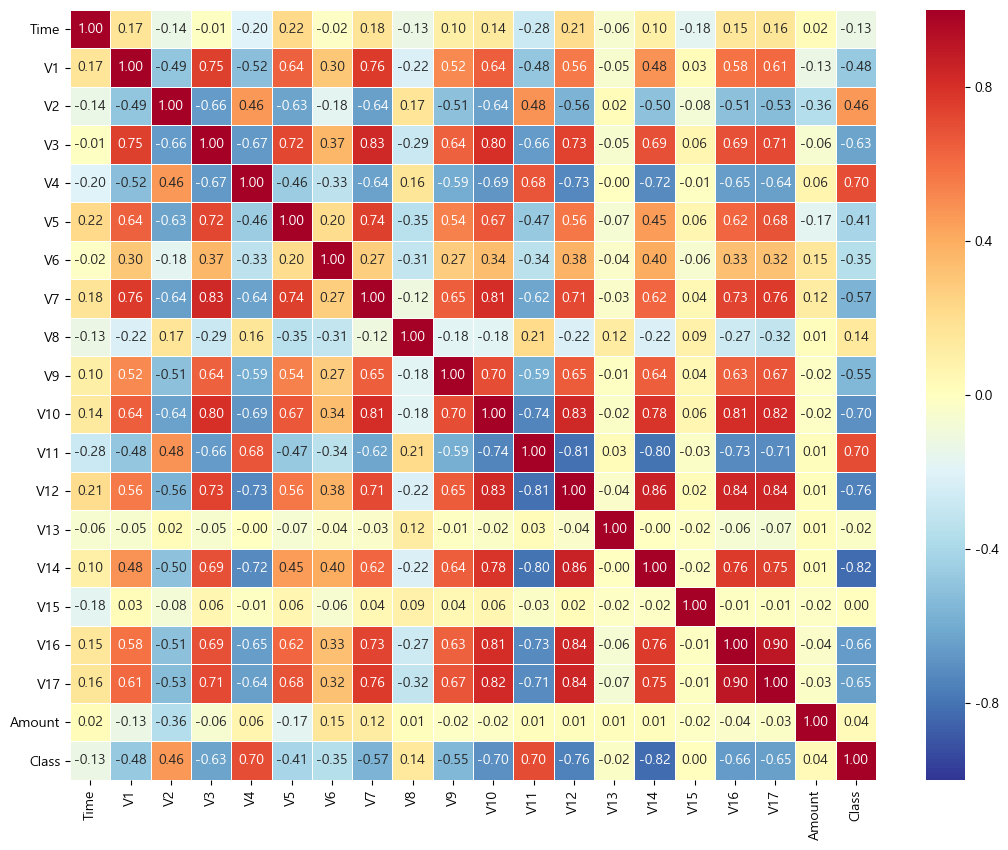

In [17]:
df_corr = df.corr()
plt.figure(figsize=(13,10))
sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='RdYlBu_r', linewidth=.5)
plt.show()

[해석]
- 독립변수간 상대적으로 강한 상관성을 보이는 경우(V16 ~ V17)가 있으므로 다중공선성을 의심할 수 있음.
- 따라서 차원 축소와 같은 방법으로 다중공선성을 해결할 수 있는 전처리를 고려해야할 수 있음.

### 2. 차원 축소
#### (1) 차원 축소 방법 2가지 이상을 비교하고 한 가지를 선택하시오.
[해석]
1. 요인분석
    - 수집된 많은 변수들이 있을 때, 유사한 항목들끼리 묶어서 처리하는 기법이다. 이 때에는 독립변수와 종속변수의 개념이 없으며, 모든 변수들 간의 관계를 분석함으로써 공통요인을 분석가의 판단으로 묶어서 처리할 수 있다.
1. 주성분 분석
    - 주성분분석이란 데이터에서 여러 변수들이 있을 때, 서로 상관성이 높은 변수들의 선형결합으로 이루어진 '주성분'이라는 새로운 변수를 만들어 요인을 요약하고 축소하는 기법이다. 변수들의 성격을 알 수 없는 해당 데이터에 어울리는 분석은 PCA이다.

#### (2) 위에서 선택한 방법을 실제로 수행하고, 선택한 이유를 설명하시오.
[해석]
- 해당 데이터의 의미를 정확하게 이해하고 있지 못할 때에는 분석가의 주관적인 견해가 들어가는 요인분석은 사용하기가 어렵다.
- PCA는 데이터 간의 선형 관계만을 가지고 판단하고, 주어진 데이터를 최대한 보존하여 저차원의 데이터를 얻을 수 있으므로 지금과 같은 가명처리 된 변수에 적합한 기법이라 판단하였다.

In [24]:
# Amount 데이터 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1), copy=True)
scaled_Amount = scaler.fit_transform(df[['Amount']])

array([[-0.94639854],
       [-1.        ],
       [-0.99029298],
       ...,
       [-0.97168836],
       [-0.91006466],
       [-0.99646254]])

In [25]:
df['Scaled_Amount'] = scaled_Amount

In [26]:
# 차원 축소할 데이터만 추출
features = df.columns.drop(['Time', 'Class', 'Amount'])
features

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'Scaled_Amount'],
      dtype='object')

In [33]:
# 주성분분석
from sklearn.decomposition import PCA

# screee plot으로 주성분 개수 정하기
pca = PCA(n_components=18)
pca_fit = pca.fit(df[features])

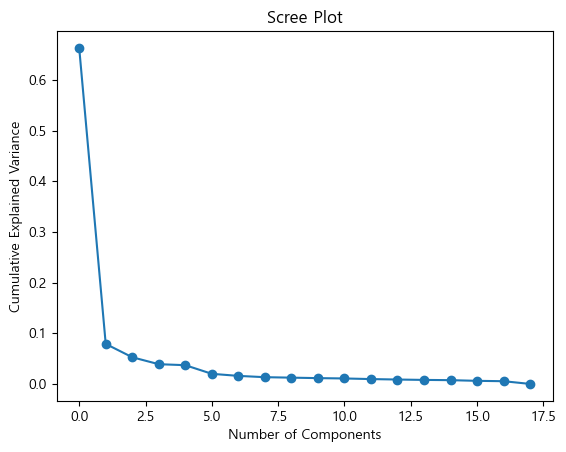

In [34]:
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_, 'o-')

In [38]:
print('주성분 3개로 축소할 시 분산설명력 :', pca.explained_variance_ratio_[:3].sum()*100)
print('주성분 9개로 축소할 시 분산설명력 :', pca.explained_variance_ratio_[:9].sum()*100)

주성분 3개로 축소할 시 분산설명력 : 79.4794094172914
주성분 9개로 축소할 시 분산설명력 : 93.24159411774042


### 3. 오버 샘플링과 언더 샘플링
#### (1) 오버 샘플링과 언더샘플링의 장단점을 비교하고 선택하시오.
1. 오버 샘플링
    - 장점: 소수의 레이블을 지닌 데이터세트를 다수 레이블을 지닌 데이터세트의 수만틈 증식시켜 학습에 사용하기 위한 충분한 양과 비율의 데이터를 확보하는 기법이고, 데이터 손실이 없어 일반적으로 언더 샘플링보다 성능이 유리함.
    - 단점: 랜덤 오버 샘플링은 오버피팅의 우려가 있으며, KNN을 이용한 방법은 오버피팅을 막을 수 있지만 새로운 데이터나 작은 데이터세트에서는 사용하기 어려움.
1. 언더 샘플링
    - 장점: 다수의 레이블을 가진 데이터를 샘플링하여 소수의 데이터 세트가 가진 레이블의 수 수준으로 감소시키는 기법으로 데이터 불균형 문제를 피할 수 있음.
    - 단점: 전체 데이터 수가 급격하게 줄어들어 오히려 학습 성능을 떨어뜨릴 수 있음.
    
- 본 분석에서는 데이터세트가 크기 때문에 언더 샘플링을 하면 데이터 손실이 크므로 오버 샘플링을 진행함.

#### (2) 분류분석 구현 및 위에서 선택한 샘플링 기법 중 2가지 이상의 알고리즘으로 모델을 비교하고 성능을 측정하시오.